In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# ***Chapter One: Graphical Exploratory Data Analysis***

***Introduction to Exploratory Data Analysis***

In [ ]:
import pandas as pd

In [ ]:
df_swing=pd.read_csv('/content/gdrive/MyDrive/2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [ ]:
df_swing[['state','county','dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


In [ ]:
df_swing['dem_votes_percentage']=(df_swing['dem_votes']/df_swing['dem_votes'].sum()) * 100
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share,dem_votes_percentage
0,PA,Erie County,127691,75775,50351,60.08,0.722936
1,PA,Bradford County,25787,10306,15057,40.64,0.098325
2,PA,Tioga County,17984,6390,11326,36.07,0.060964
3,PA,McKean County,15947,6465,9224,41.21,0.061680
4,PA,Potter County,7507,2300,5109,31.04,0.021943


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

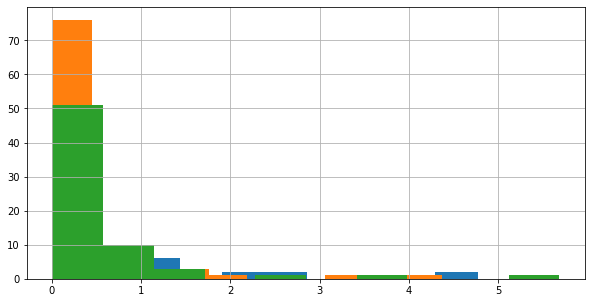

In [ ]:
plt.figure(figsize=(10,5))
df_swing.groupby('state')['dem_votes_percentage'].hist()
plt.show()

In [ ]:
df_swing.state.unique()

array(['PA', 'OH', 'FL'], dtype=object)

In [ ]:
df_swing.groupby('state')['dem_votes_percentage'].count()

state
FL    67
OH    88
PA    67
Name: dem_votes_percentage, dtype: int64

*You're right. That statement is pretty absurd. If you don't have time to do EDA, you really don't have time to do hypothesis tests. And you should always do EDA first.*

*While a good, informative plot can sometimes be the end point of an analysis, it is more like a beginning: it helps guide you in the quantitative statistical analyses that come next.*

**Plotting a Histogram**

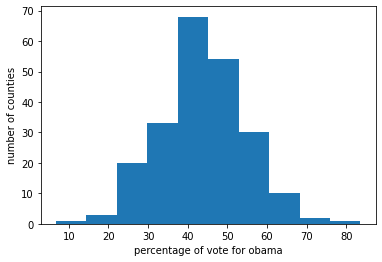

In [ ]:
plt.hist(df_swing['dem_share'])
plt.xlabel("percentage of vote for obama")
plt.ylabel("number of counties")
plt.show()

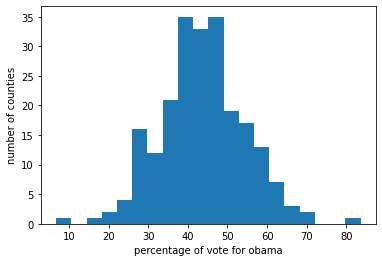

In [ ]:
plt.hist(df_swing['dem_share'],bins=20)
plt.xlabel("percentage of vote for obama")
plt.ylabel("number of counties")
plt.show()

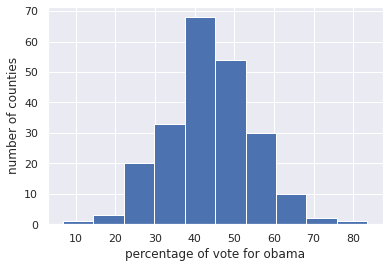

In [ ]:
sns.set()
plt.hist(df_swing['dem_share'])
plt.xlabel("percentage of vote for obama")
plt.ylabel("number of counties")
plt.show()

In [ ]:
df_iris=pd.read_csv('/content/gdrive/MyDrive/iris.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
versicolor_petal_length=df_iris[df_iris['species'] == 'versicolor']
versicolor_petal_length.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


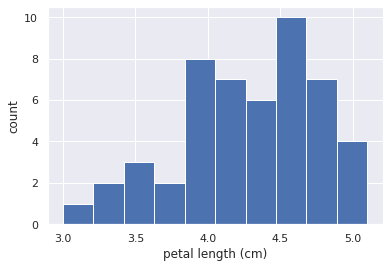

In [ ]:
sns.set()
plt.hist(versicolor_petal_length['petal_length'])
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

*The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins*

In [ ]:
import numpy as np

In [ ]:
n_data=len(versicolor_petal_length['petal_length'])
n_data

50

In [ ]:
n_bins=np.sqrt(n_data)
type(n_bins)

numpy.float64

In [ ]:
n_bins=int(n_bins)
type(n_bins)

int

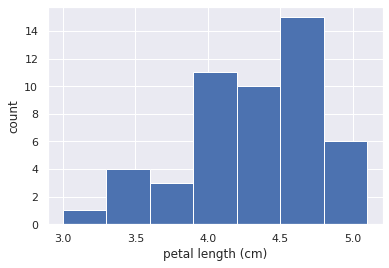

In [ ]:
sns.set()
plt.hist(versicolor_petal_length['petal_length'],bins=n_bins)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

**Plot all of your data: Bee swarm plots**

In [ ]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share,dem_votes_percentage
0,PA,Erie County,127691,75775,50351,60.08,0.722936
1,PA,Bradford County,25787,10306,15057,40.64,0.098325
2,PA,Tioga County,17984,6390,11326,36.07,0.060964
3,PA,McKean County,15947,6465,9224,41.21,0.061680
4,PA,Potter County,7507,2300,5109,31.04,0.021943


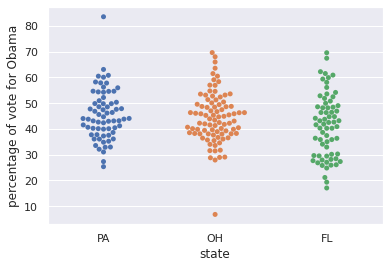

In [ ]:
sns.swarmplot(x='state',y='dem_share',data=df_swing)
plt.xlabel("state")
plt.ylabel("percentage of vote for Obama")
plt.show()

In [ ]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


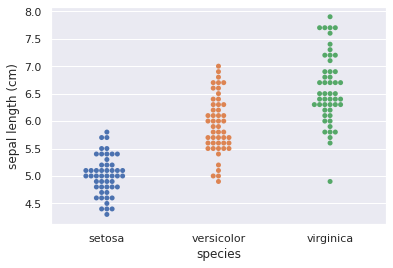

In [ ]:
sns.swarmplot(x='species',y='sepal_length',data=df_iris)
plt.xlabel('species')
plt.ylabel('sepal length (cm)')
plt.show()

**Plot all of your data: Empirical cumulative distribution function (ECDFs)**

In [ ]:
df_all_states=pd.read_csv('/content/gdrive/MyDrive/2008_all_states.csv')
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


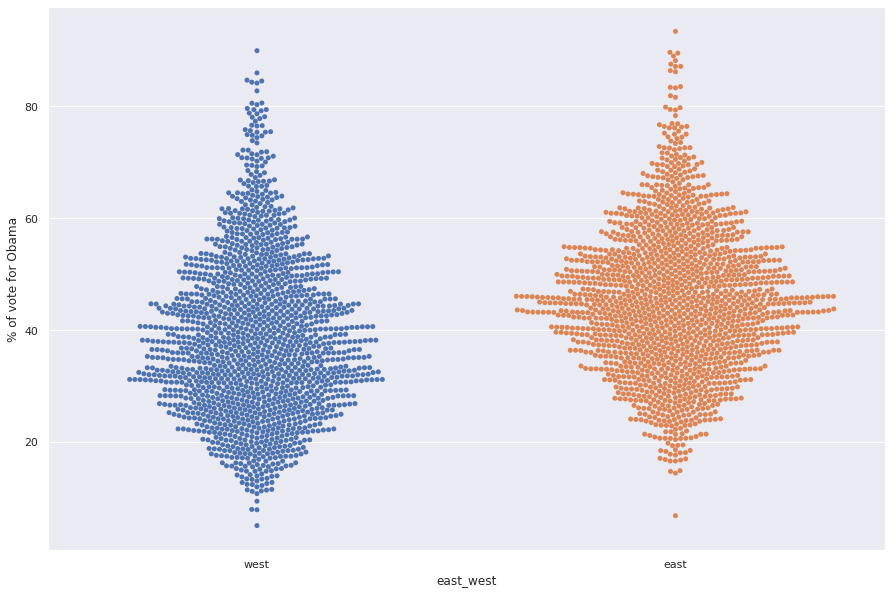

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='east_west',y='dem_share',data=df_all_states)
plt.ylabel("% of vote for Obama")
plt.show()

In [ ]:
x=np.sort(df_all_states['dem_share'])
y=np.arange(1,len(x)+1)/len(x)

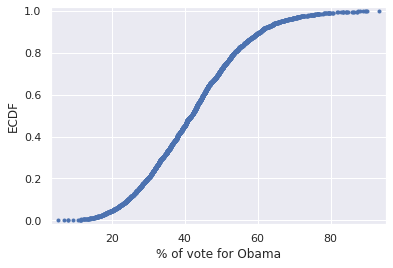

In [ ]:
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel("% of vote for Obama")
plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()

In [ ]:
def ecdf(data):
  n=len(data)
  x=np.sort(data)
  y=np.arange(1,n+1)/n

  return x,y

In [ ]:
x_vers,y_vers=ecdf(versicolor_petal_length['petal_length'])

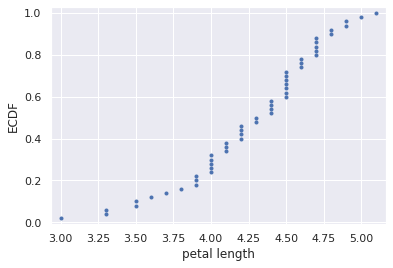

In [ ]:
plt.plot(x_vers,y_vers,marker='.',linestyle='none')
plt.xlabel('petal length')
plt.ylabel('ECDF')
plt.margins(0.03)
plt.show()

In [ ]:
versicolor_petal_length.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [ ]:
setosa_petal_length=df_iris[df_iris['species'] == 'setosa']
setosa_petal_length.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
virginica_petal_length=df_iris[df_iris['species'] == 'virginica']
virginica_petal_length.head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [ ]:
x_sets,y_sets=ecdf(setosa_petal_length['petal_length'])
x_virs,y_virs=ecdf(virginica_petal_length['petal_length'])

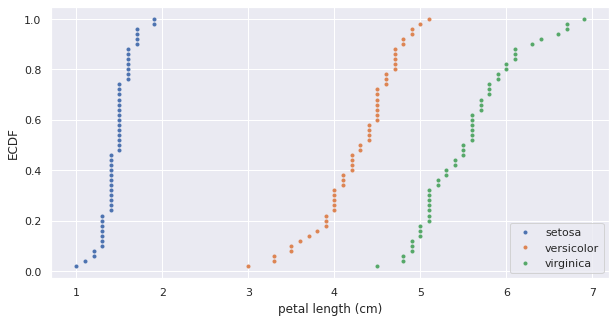

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x_sets,y_sets,marker='.', linestyle='none')
plt.plot(x_vers,y_vers,marker='.', linestyle='none')
plt.plot(x_virs,y_virs,marker='.', linestyle='none')
plt.legend(('setosa','versicolor','virginica'),loc='lower right')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.show()

*The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.*

In [ ]:
df_swing.state.unique()

array(['PA', 'OH', 'FL'], dtype=object)

In [ ]:
state_pa=df_swing[df_swing['state'] == 'PA']
state_oh=df_swing[df_swing['state'] == 'OH']
state_fl=df_swing[df_swing['state'] == 'FL']

In [ ]:
x_p,y_p=ecdf(state_pa['dem_share'])
x_o,y_o=ecdf(state_oh['dem_share'])
x_f,y_f=ecdf(state_fl['dem_share'])

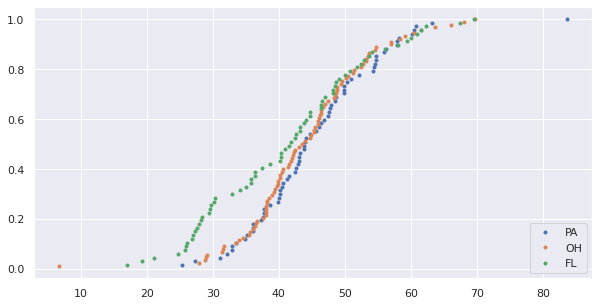

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x_p,y_p,marker='.', linestyle='none')
plt.plot(x_o,y_o,marker='.', linestyle='none')
plt.plot(x_f,y_f,marker='.', linestyle='none')
plt.legend(('PA','OH','FL'),loc='lower right')
plt.show()

# ***Chapter-2: Quantitative exploratory data analysis***

**Introduction to
summary statistics:
The sample mean
and median**

In [ ]:
mean_vote=np.mean(state_pa['dem_share'])
print(mean_vote)

45.476417910447765


In [ ]:
mean_vote=np.mean(state_oh['dem_share'])
mean_vote

44.31818181818181

In [ ]:
mean_vote=np.mean(state_fl['dem_share'])
mean_vote

41.32507462686568

*An outlier can significantly affect the value of the mean, but not the median.*

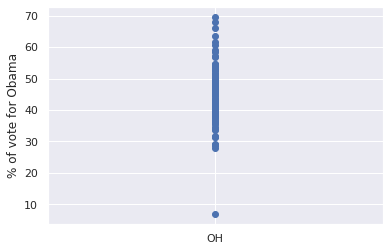

In [ ]:
plt.scatter(state_oh['state'],state_oh['dem_share'])
plt.ylabel("% of vote for Obama")
plt.show()

In [ ]:
np.median(state_fl['dem_share'])

41.85

In [ ]:
np.median(state_oh['dem_share'])

43.675

In [ ]:
np.median(state_pa['dem_share'])

44.03

In [ ]:
mean_length_vers=np.mean(versicolor_petal_length['petal_length'])
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


In [ ]:
mean_length_vers=np.mean(setosa_petal_length['petal_length'])
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 1.464 cm


**Percentiles,
outliers,
and box plots**

In [ ]:
ptiles=np.percentile(df_swing['dem_share'],[25,50,75])
ptiles

array([37.3025, 43.185 , 49.925 ])

In [ ]:
x_d,y_d=ecdf(df_swing['dem_share'])

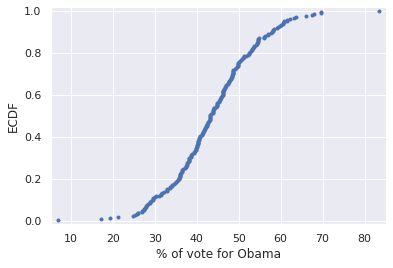

In [ ]:
plt.plot(x_d,y_d,marker='.',linestyle='none')
plt.xlabel("% of vote for Obama")
plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()

In [ ]:
percentile=np.array([25,50,75])

In [ ]:
ptiles=np.percentile(df_swing['dem_share'],percentile)
ptiles

array([37.3025, 43.185 , 49.925 ])

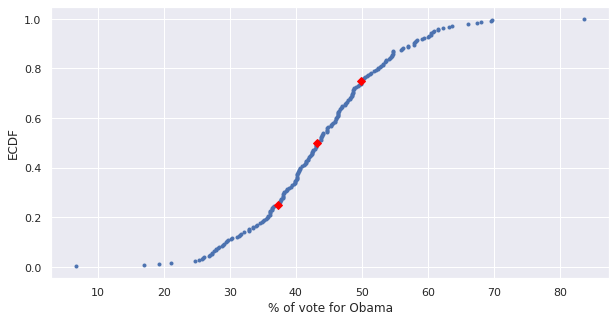

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x_d,y_d,marker='.',linestyle='none')
plt.xlabel("% of vote for Obama")
plt.ylabel("ECDF")
plt.plot(ptiles,percentile/100,marker='D', color='red',linestyle='none')
plt.show()

In [ ]:
percentiles = np.array([2.5, 25.,  50.,  75.,  97.5])

In [ ]:
ptiles_vers = np.percentile(setosa_petal_length['petal_length'], percentiles)
print(ptiles_vers)

[1.1225 1.4    1.5    1.575  1.855 ]


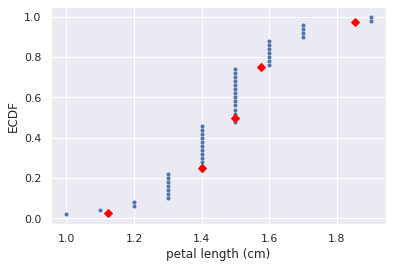

In [ ]:
plt.plot(x_sets,y_sets,marker='.', linestyle='none')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',linestyle='none')
plt.show()

In [ ]:
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


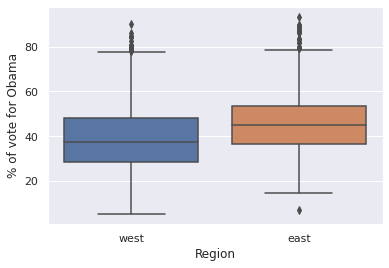

In [ ]:
sns.boxplot(x='east_west',y='dem_share',data=df_all_states)
plt.xlabel("Region")
plt.ylabel("% of vote for Obama")
plt.show()

In [ ]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


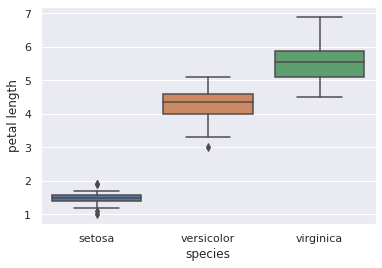

In [ ]:
sns.boxplot(x='species',y='petal_length',data=df_iris)
plt.xlabel("species")
plt.ylabel("petal length")
plt.show()

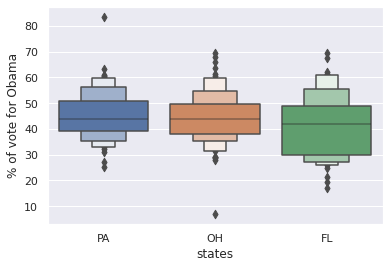

In [ ]:
sns.boxenplot(x='state',y='dem_share',data=df_swing)
plt.xlabel("states")
plt.ylabel("% of vote for Obama")
plt.show()

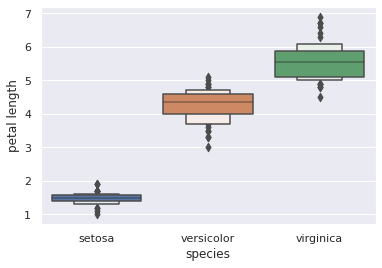

In [ ]:
sns.boxenplot(x='species',y='petal_length',data=df_iris)
plt.xlabel("species")
plt.ylabel("petal length")
plt.show()

**Variance and Standard Deviation**

*●The mean squared distance of the data from their
mean
● Informally, a measure of the spread of data*

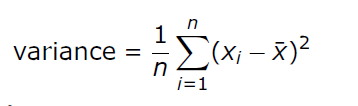

In [ ]:
diff=state_fl['dem_share']-np.mean(state_fl['dem_share'])

In [ ]:
diff_sq=diff**2

In [ ]:
variance=np.mean(diff_sq)

In [ ]:
variance_np=np.var(state_fl['dem_share'])

In [ ]:
print(variance,variance_np)

147.44278618846064 147.44278618846064


In [ ]:
np.var(versicolor_petal_length['petal_length'])

0.21640000000000012

*The standard deviation is the square root of the variance.*

In [ ]:
np.sqrt(np.var(virginica_petal_length['petal_length']))

0.5463478745268441

In [ ]:
np.std(virginica_petal_length['petal_length'])

0.5463478745268441

In [ ]:
np.std(state_fl['dem_share'])

12.142602117687158

**Covariance and the
Pearson correlation
coefficient**

In [ ]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share,dem_votes_percentage
0,PA,Erie County,127691,75775,50351,60.08,0.722936
1,PA,Bradford County,25787,10306,15057,40.64,0.098325
2,PA,Tioga County,17984,6390,11326,36.07,0.060964
3,PA,McKean County,15947,6465,9224,41.21,0.061680
4,PA,Potter County,7507,2300,5109,31.04,0.021943


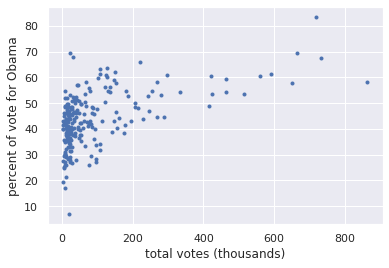

In [ ]:
plt.plot(df_swing['total_votes']/1000,df_swing['dem_share'],marker='.',linestyle='none')
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')
plt.show()

*The largest spread corresponds to the largest variance.*

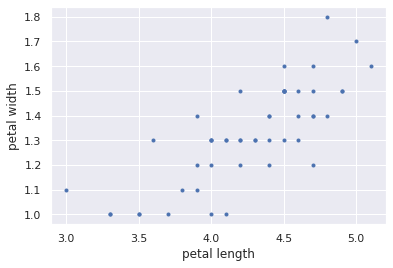

In [ ]:
plt.plot(versicolor_petal_length['petal_length'],versicolor_petal_length['petal_width'],marker='.', linestyle='none')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

*Covariance is a measure of how two quantities vary together*

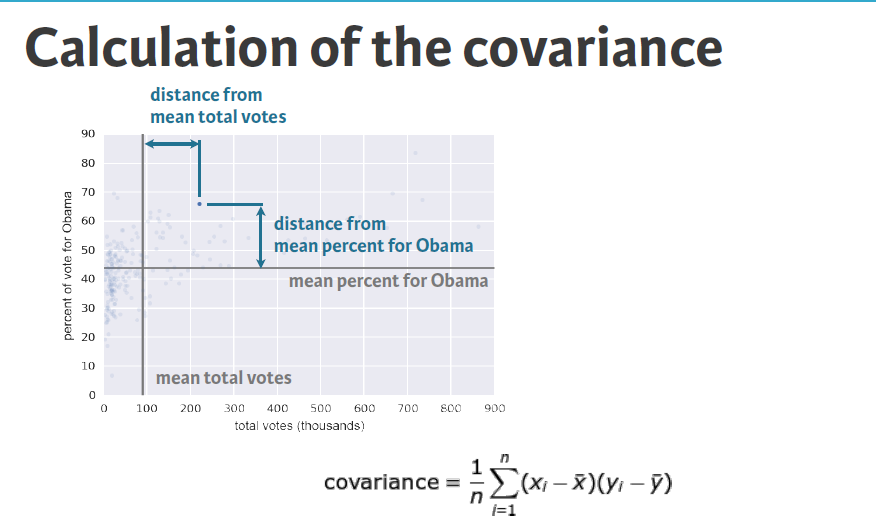

In [ ]:
dis_tot_vote=df_all_states['total_votes']-np.mean(df_all_states['total_votes'])

In [ ]:
dis_vote_obama=df_all_states['dem_share']-np.mean(df_all_states['dem_share'])

In [ ]:
mul=dis_tot_vote*dis_vote_obama

In [ ]:
covariance=np.mean(mul)

In [ ]:
covariance_np=np.cov(df_all_states['total_votes'],df_all_states['dem_share'])

In [ ]:
covariance

479366.33397955203

In [ ]:
covariance_np

array([[1.42266957e+10, 4.79518417e+05],
       [4.79518417e+05, 1.97317595e+02]])

In [ ]:
covariance_np=covariance_np[0,1]
covariance_np

479518.41720733687

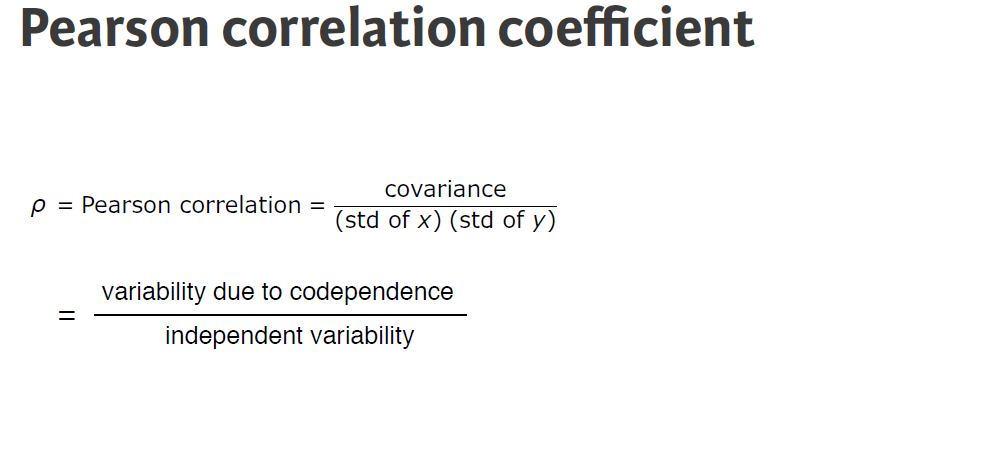

In [ ]:
std_tot_obama=np.std(df_all_states['total_votes'])*np.std(df_all_states['dem_share'])

In [ ]:
pearson_corr=covariance/std_tot_obama

In [ ]:
pearson_corr

0.2862004837881383

In [ ]:
pearson_corr_=np.corrcoef(df_all_states['total_votes'],df_all_states['dem_share'])
pearson_corr_=pearson_corr_[0,1]
pearson_corr_

0.2862004837881379

In [ ]:
def pearson_r(x,y):
  corr_mat=np.corrcoef(x,y)
  correlation=corr_mat[0,1]

  return correlation

In [ ]:
pearson_r(df_all_states['total_votes'],df_all_states['dem_share'])

0.2862004837881379

In [ ]:
pearson_r(df_iris['petal_length'],df_iris['sepal_length'])

0.8717541573048718

In [ ]:
pearson_r(df_iris['petal_width'],df_iris['sepal_width'])

-0.35654408961380535

# ***Chapter-3: Thinking probabilistically-- Discrete variable***

**Probabilistic logic
and statistical
inference**

*A major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it.*

**Random number
generators and
hacker statistics**

*Hacker statistics uses simulated repeated measurements to compute
probabilities.*

**Bernoulli Trial-** *An experiment that has two options,
"success" (True) and "failure" (False).*

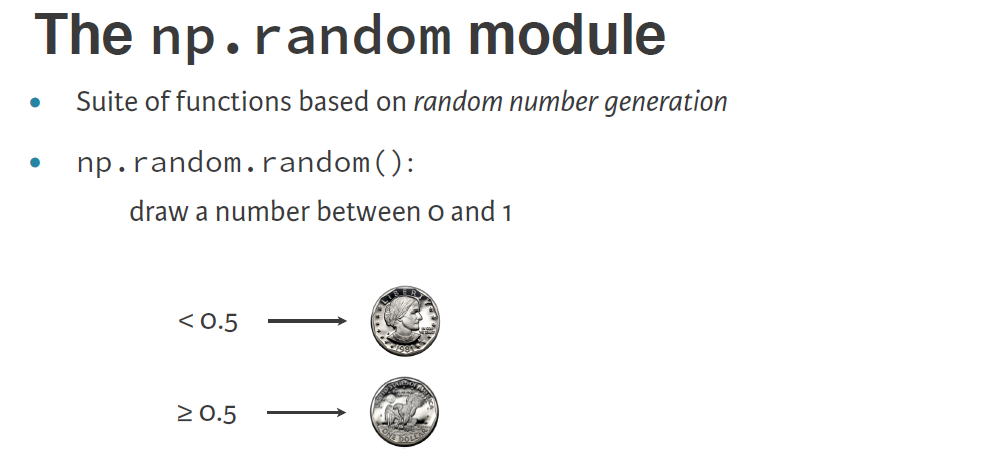

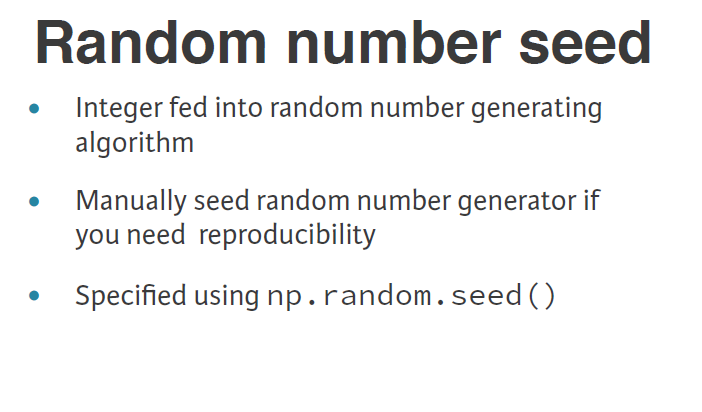

Simulating 4 coin flips

In [ ]:
np.random.seed(42)

In [ ]:
random_numbers=np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [ ]:
head=random_numbers>0.5
head

array([False,  True,  True,  True])

In [ ]:
np.sum(head)

3

In [ ]:
n_all_heads=0

for _ in range(500):
  head=np.random.random(size=4) > 0.50
  n_head=np.sum(head)
  if n_head == 4:
    n_all_heads += 1

n_all_heads/500

0.06

(array([104.,  89.,  99., 104., 100.,  95.,  98., 106., 103., 102.]),
 array([1.16347554e-05, 9.97925568e-02, 1.99573479e-01, 2.99354401e-01,
        3.99135323e-01, 4.98916245e-01, 5.98697167e-01, 6.98478089e-01,
        7.98259011e-01, 8.98039934e-01, 9.97820856e-01]),
 <a list of 10 Patch objects>)

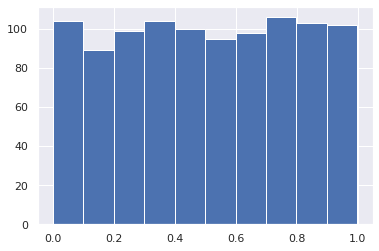

In [ ]:
random=np.random.random(1000)
plt.hist(random)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


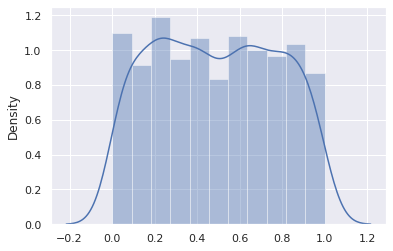

In [ ]:
random=np.random.random(1000)
sns.distplot(random)


The np.random module and Bernoulli trials

In [ ]:
def bernoulli_trail(n,p):
  n_success=0

  for _ in range(n):
    random=np.random.random()

    if random < p:
      n_success += 1
  
  return n_success

In [ ]:
bernoulli_trail(10000,0.50)

5094

How many defaults might we expect?

Text(0, 0.5, 'probability')

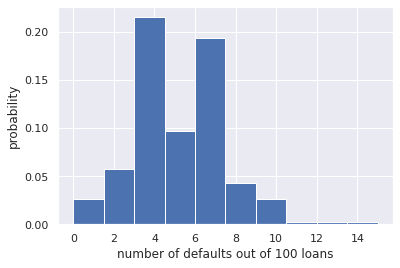

In [ ]:
np.random.seed(42)

n_defaults=np.empty(1000)

for i in range(1000):
  n_defaults[i] = bernoulli_trail(100,0.05)

plt.hist(n_defaults,density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')

Will the bank fail?

In [ ]:
x,y=ecdf(n_defaults)

Probability of losing money = 0.022


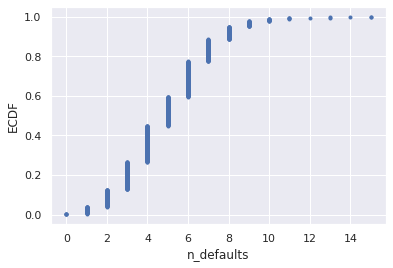

In [ ]:
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('n_defaults')
plt.ylabel('ECDF')

n_loss_money=np.sum(n_defaults>=10)

print('Probability of losing money =', n_loss_money/len(n_defaults))

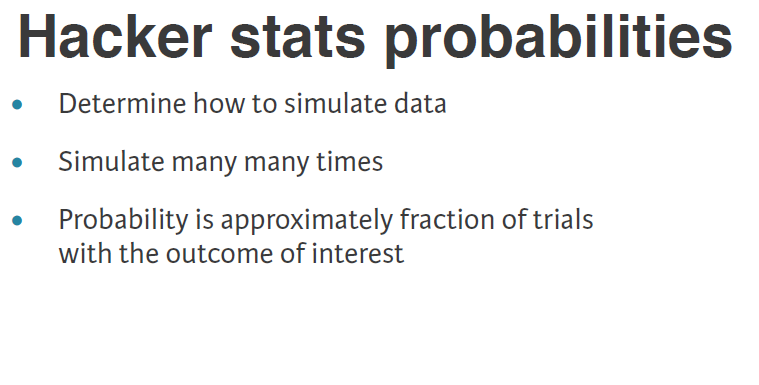

**Probability
distributions and
stories: The
Binomial
distribution**

**PMF:** *The set of probabilities of discrete outcomes*

**Probability Distribution:** *A mathematical description of outcomes*

**Discrete Uniform distribution:** *The outcome of rolling a single fair die is Discrete Uniformly distributed.*

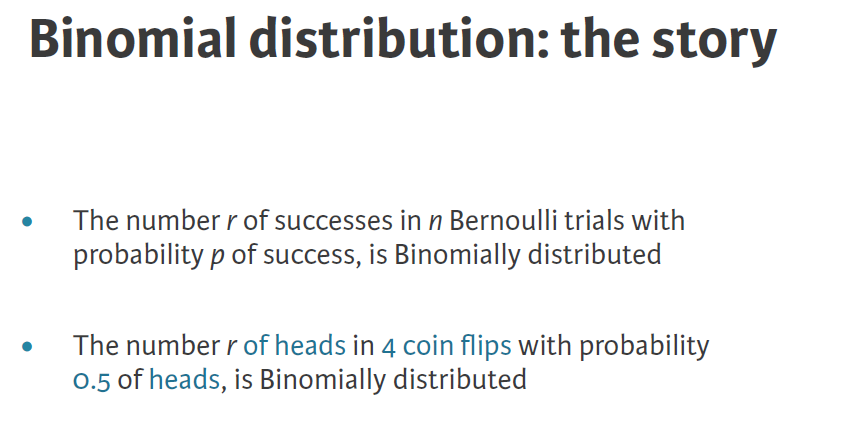

In [ ]:
np.random.binomial(4,0.5)

2

In [ ]:
np.random.binomial(4,0.5,size=20)

array([2, 2, 2, 2, 2, 3, 3, 2, 2, 0, 3, 1, 2, 1, 2, 2, 2, 2, 1, 3])


Plotting the Binomial PMF

In [ ]:
sample=np.random.binomial(60,0.1,size=1000)

In [ ]:
bins=np.arange(1,max(sample)+1.5) - 0.5

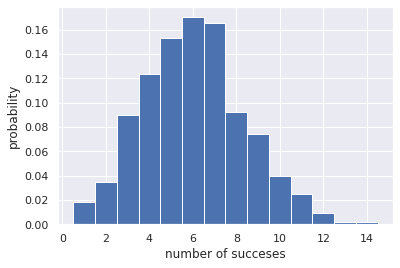

In [ ]:
plt.hist(sample,density=True,bins=bins)
plt.xlabel("number of succeses")
plt.ylabel("probability")
plt.show()

In [ ]:
bins=np.arange(1,max(n_defaults)+1.5) - 0.5

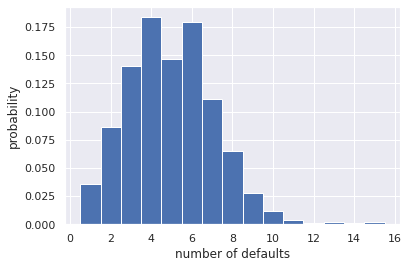

In [ ]:
plt.hist(n_defaults,density=True,bins=bins)
plt.xlabel("number of defaults")
plt.ylabel("probability")
plt.show()

The Binomial CDF

In [ ]:
x,y=ecdf(sample)

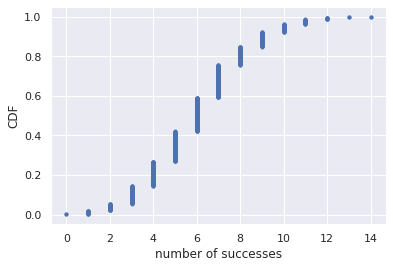

In [ ]:
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('number of successes')
plt.ylabel('CDF')
plt.show()

**Poisson processes
and the Poisson
distribution**

*The timing of the next event is completely
independent of when the previous event happened*

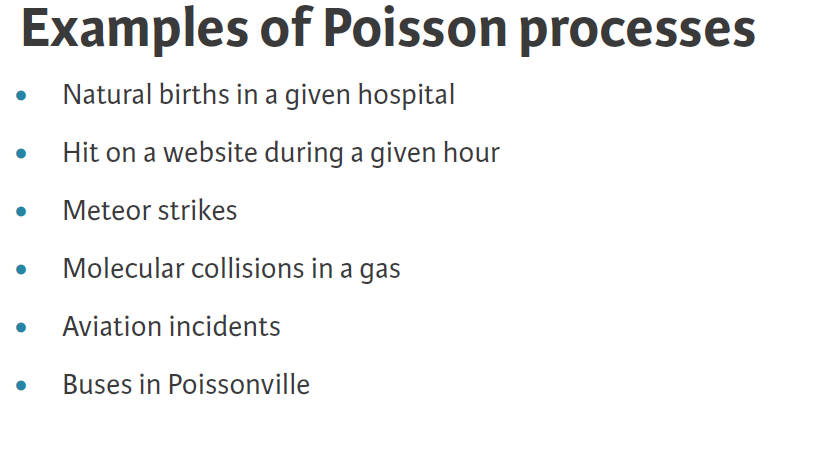

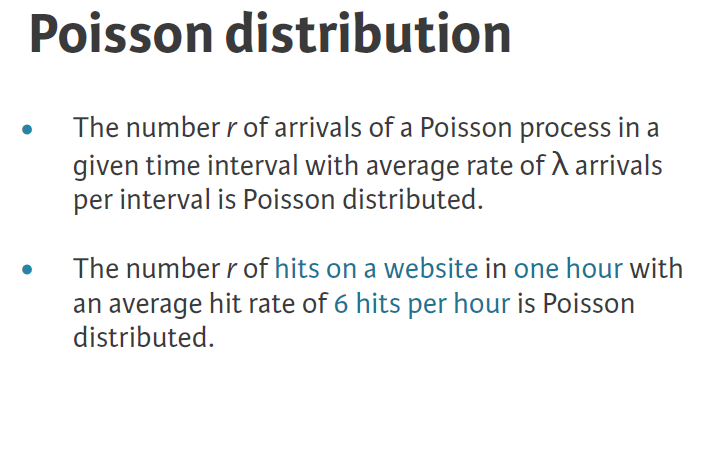

**Poisson Distribution:** *● Limit of the Binomial distribution for low
probability of success and large number of trials.
● That is, for rare events*

In [ ]:
sample=np.random.poisson(4,size=20)
sample

array([1, 3, 3, 4, 3, 3, 2, 4, 2, 6, 1, 4, 4, 5, 4, 5, 2, 8, 5, 3])

In [ ]:
np.median(sample)

3.5

In [ ]:
x,y=ecdf(sample)

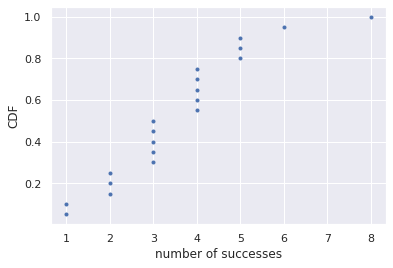

In [ ]:
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('number of successes')
plt.ylabel('CDF')
plt.show()

In [ ]:
bins=np.arange(1,max(sample)+1.5) - 0.5

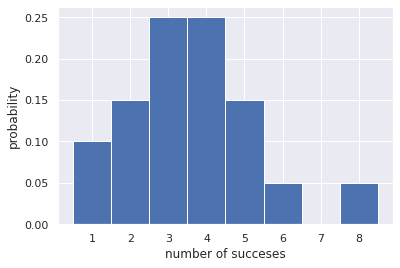

In [ ]:
plt.hist(sample,density=True,bins=bins)
plt.xlabel("number of succeses")
plt.ylabel("probability")
plt.show()


Relationship between Binomial and Poisson distributions

In [ ]:
sample_poisson=np.random.poisson(10,size=10000)

In [ ]:
np.mean(sample_poisson), np.std(sample_poisson)

(9.9943, 3.1829337897606353)

In [ ]:
sample_binomial=np.random.binomial(10,0.5,size=10000)

In [ ]:
np.mean(sample_binomial), np.std(sample_binomial)

(5.0164, 1.5814332233768202)

**Was 2015 anomalous?**

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games.

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [ ]:
no_hitters=np.random.poisson(251/115,size=10000)

In [ ]:
n_large=np.sum(no_hitters>=7)
n_large

76

In [ ]:
p_large=n_large/10000
p_large

0.0076

# ***Chapter-4: Thinking probabilistically-- Continuous variables***

**PDF and CDF**

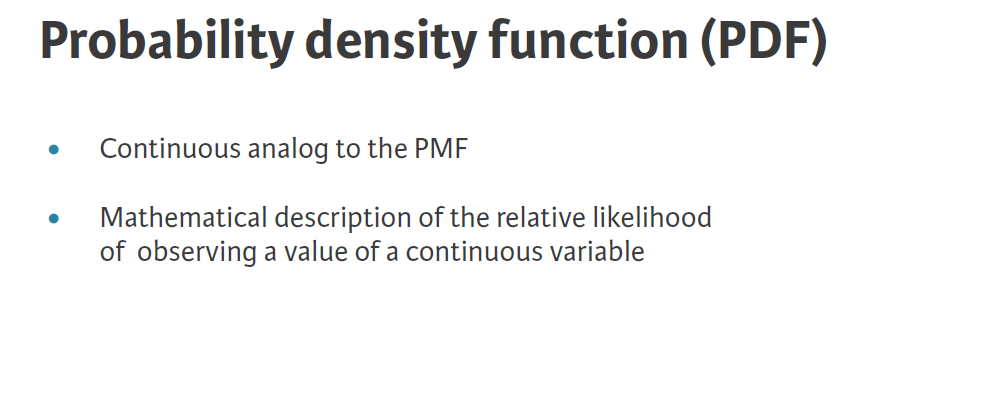

**Normal distribution**

*Describes a continuous variable whose
PDF has a single symmetric peak*

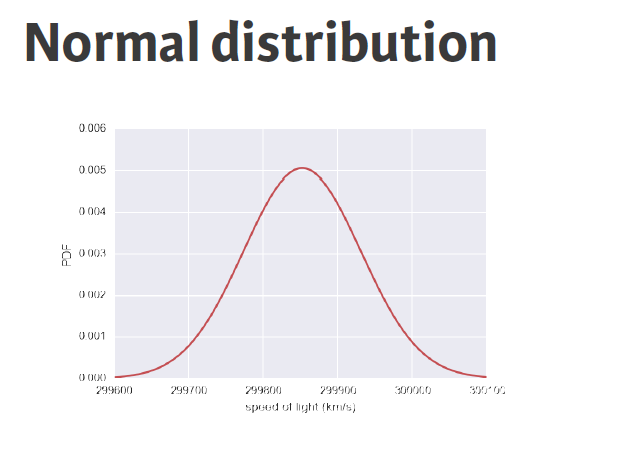

In [ ]:
df_michelson=pd.read_csv('/content/gdrive/MyDrive/michelson_speed_of_light.csv')
df_michelson.head()

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [ ]:
mean=np.mean(df_michelson['velocity of light in air (km/s)'])
mean

299852.4

In [ ]:
std=np.std(df_michelson['velocity of light in air (km/s)'])
std

78.61450247886843

In [ ]:
sample=np.random.normal(mean,std,size=1000)

In [ ]:
x,y=ecdf(df_michelson['velocity of light in air (km/s)'])

In [ ]:
x_theor,y_theor=ecdf(sample)

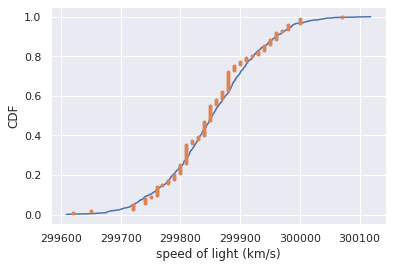

In [ ]:
plt.plot(x_theor,y_theor)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('speed of light (km/s)')
plt.ylabel("CDF")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


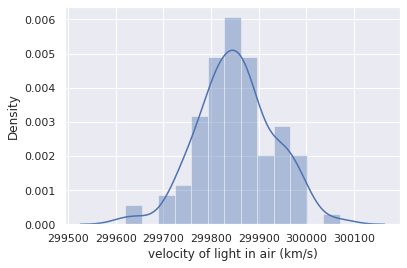

In [ ]:
sns.distplot(df_michelson['velocity of light in air (km/s)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


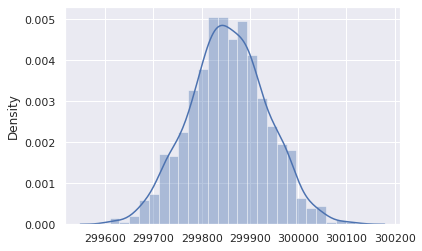

In [ ]:
sns.distplot(sample)

The Normal PDF

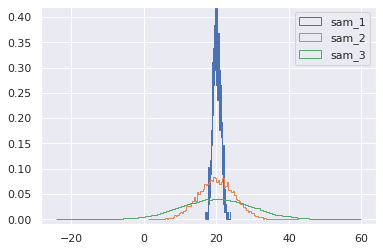

In [ ]:
sample_1=np.random.normal(20,1,1000)
sample_2=np.random.normal(20,5,10000)
sample_3=np.random.normal(20,10,100000)

plt.hist(sample_1,density=True,histtype='step',bins=100)
plt.hist(sample_2,density=True,histtype='step',bins=100)
plt.hist(sample_3,density=True,histtype='step',bins=100)


plt.legend(('sam_1','sam_2','sam_3'))
plt.ylim(-0.01, 0.42)

plt.show()

The Normal CDF

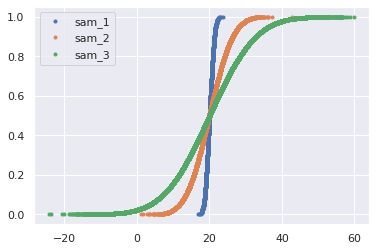

In [ ]:
x1,y1=ecdf(sample_1)
x2,y2=ecdf(sample_2)
x3,y3=ecdf(sample_3)

plt.plot(x1,y1,marker='.', linestyle='none')
plt.plot(x2,y2,marker='.', linestyle='none')
plt.plot(x3,y3,marker='.', linestyle='none')

plt.legend(('sam_1','sam_2','sam_3'))
plt.show()

**The Normal
distribution:
Properties and
warnings**

In [ ]:
df_belmont=pd.read_csv('/content/gdrive/MyDrive/belmont.csv')
df_belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


**Are the Belmont Stakes results Normally distributed?**

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, it is loaded to belmont_no_outliers.

In [ ]:
belmont_no_outliers=df_belmont[~((df_belmont['Year'] == 1970) | (df_belmont['Year'] == 1973))].Time

In [ ]:
belmont_no_outliers

0     2:28.51
1     2:26.65
2     2:28.52
3     2:30.70
4     2:30.42
       ...   
86    2:31.60
87    2:32.80
88    2:33.20
89    2:32.40
90    2:32.20
Name: Time, Length: 89, dtype: object

In [ ]:
def convert(x):
  return float(x.split(':')[0]) * 60 + float(x.split(':')[1].split('.')[0]) + float(x.split('.')[-1])/100
belmont_no_outliers=belmont_no_outliers.apply(convert)
belmont_no_outliers

0     148.51
1     146.65
2     148.52
3     150.70
4     150.42
       ...  
86    151.60
87    152.80
88    153.20
89    152.40
90    152.20
Name: Time, Length: 89, dtype: float64

In [ ]:
mean=np.mean(belmont_no_outliers)
std=np.std(belmont_no_outliers)

In [ ]:
sample=np.random.normal(mean,std,size=10000)

In [ ]:
x_theor,y_theor=ecdf(sample)
x,y=ecdf(belmont_no_outliers)

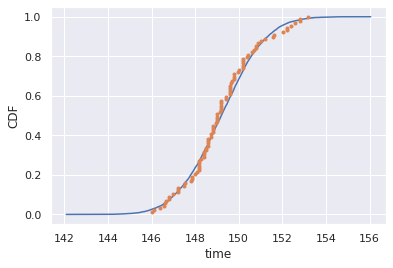

In [ ]:
plt.plot(x_theor,y_theor)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('time')
plt.ylabel("CDF")
plt.show()

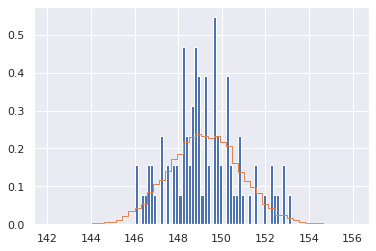

In [ ]:
plt.hist(belmont_no_outliers,density=True,bins=50)
plt.hist(sample,density=True,histtype='step',bins=50)
plt.show()

**What are the chances of a horse matching or beating Secretariat's record?**

In [ ]:
p=np.sum(sample <= 144)

In [ ]:
p=p/10000
p

0.0006

In [ ]:
p=p/10000000
p

6e-11

**The Exponential
distribution**

*The waiting time between arrivals of a Poisson
process is Exponentially distributed*

In [ ]:
mean=np.mean(belmont_no_outliers)

In [ ]:
sample=np.random.exponential(mean,size=10000)

In [ ]:
x_theor,y_theor=ecdf(sample)
x,y=ecdf(belmont_no_outliers)

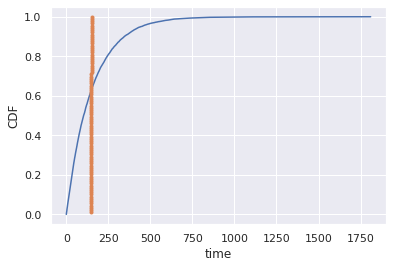

In [ ]:
plt.plot(x_theor,y_theor)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('time')
plt.ylabel('CDF')
plt.show()

**If you have a story, you can simulate it!**

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [ ]:
def poisson(wait1,wait2,size=1):
  t1=np.random.exponential(wait1,size)
  t2=np.random.exponential(wait2,size)

  return t1+t2

**Distribution of no-hitters and cycles**

Use the sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

In [ ]:
total_time=poisson(764,715,size=100000)

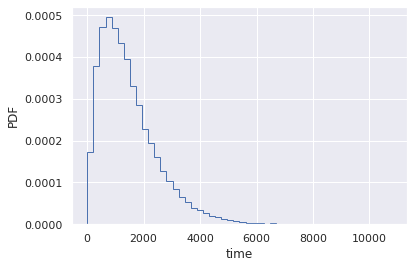

In [ ]:
plt.hist(total_time,bins=50,histtype='step',density=True)
plt.xlabel("time")
plt.ylabel("PDF")
plt.show()

In [ ]:
x,y=ecdf(total_time)

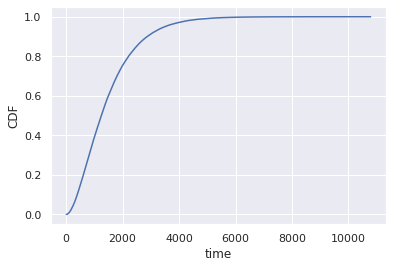

In [ ]:
plt.plot(x,y)
plt.xlabel("time")
plt.ylabel("CDF")
plt.show()

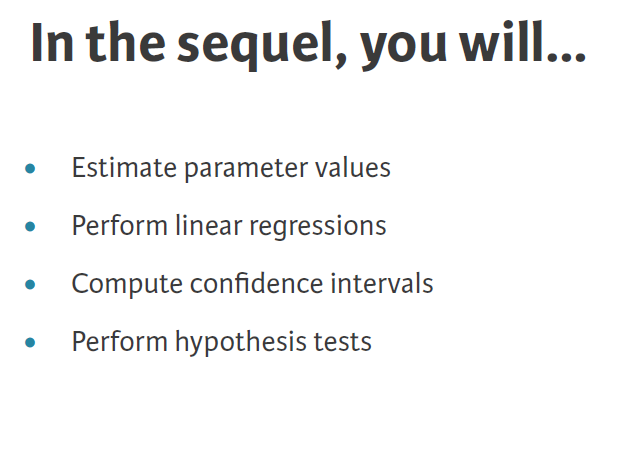